In [1]:
from glob import glob
from framed import load_cbmodel
import pandas as pd
import numpy as np
from framed.io.sbml import sanitize_id
import cobra
from cobra.io import read_sbml_model
from operator import itemgetter
import matplotlib.pyplot as plt

In [2]:
AllDrugs=pd.read_excel('2018DrugsCIDs.xlsx', header=0)
AllDrugs

,prestwickID,DrugName,CID,ATCcodes,targetSpecies
0,Prestw-1,Azaguanine-8,CIDs00008646,L01BB,human
1,Prestw-10,Sulfaguanidine,CIDs00005324,A07AB03,bacteria
2,Prestw-100,Nocodazole,CIDs00004122,L01XX,human
3,Prestw-1000,Lymecycline,CIDs54687131,J01AA04,bacteria
4,Prestw-1001,Alfadolone acetate,CIDs00024733,N01AX,human
...,...,...,...,...,...
1195,Prestw-994,Cyclopenthiazide,CIDs00002904,C03AA07,human
1196,Prestw-995,Fluvoxamine maleate,CIDs00003404,N06AB08,human
1197,Prestw-997,Fluticasone propionate,CIDs00003399,D07AC17,human
1198,Prestw-998,Zuclopenthixol dihydrochloride,CIDs00012453,N05AF02 N05AF05,human


In [3]:
PvalueDrugs=pd.read_excel('S3.xlsx', header=0)
pvalueDrugsList=list(PvalueDrugs.prestwick_ID.unique())
print(len(pvalueDrugsList))

1197


In [4]:
#drugs that don't have p-value
NoPvalueDrugs=AllDrugs[~AllDrugs.prestwickID.isin(pvalueDrugsList)]
print(len(NoPvalueDrugs))
NoPvalueDrugs

3


,prestwickID,DrugName,CID,ATCcodes,targetSpecies
109,Prestw-1105,Verteporfin,CIDs05362420,S01LA01,human
673,Prestw-385,Mitoxantrone dihydrochloride,CIDs00004212,L01DB07,human
710,Prestw-425,Chicago sky blue 6B,CIDs05359775,-,not a drug


In [5]:
Drugs=AllDrugs[AllDrugs.prestwickID.isin(pvalueDrugsList)]
print(len(Drugs))
Drugs=Drugs.reset_index(drop=True)
Drugs

1197


,prestwickID,DrugName,CID,ATCcodes,targetSpecies
0,Prestw-1,Azaguanine-8,CIDs00008646,L01BB,human
1,Prestw-10,Sulfaguanidine,CIDs00005324,A07AB03,bacteria
2,Prestw-100,Nocodazole,CIDs00004122,L01XX,human
3,Prestw-1000,Lymecycline,CIDs54687131,J01AA04,bacteria
4,Prestw-1001,Alfadolone acetate,CIDs00024733,N01AX,human
...,...,...,...,...,...
1192,Prestw-994,Cyclopenthiazide,CIDs00002904,C03AA07,human
1193,Prestw-995,Fluvoxamine maleate,CIDs00003404,N06AB08,human
1194,Prestw-997,Fluticasone propionate,CIDs00003399,D07AC17,human
1195,Prestw-998,Zuclopenthixol dihydrochloride,CIDs00012453,N05AF02 N05AF05,human


In [6]:
ATCdrugs=AllDrugs.copy()
ATCdrugs=ATCdrugs[['ATCcodes']]
n=0
for index, row in ATCdrugs.iterrows():
    rowClasses=[]
    rowClassesIndexes=[]
    rowDF=ATCdrugs.iloc[[index]]
    rowValues=rowDF.values.tolist()[0]
    rowValues=[item.split() for item in rowValues][0]
    if len(rowValues) ==0:
        n+=1
print(n)

0


In [7]:
targetSpDF=AllDrugs.copy()
ATCdrugs=AllDrugs.copy()
ATCdrugs=ATCdrugs[['ATCcodes']]
# Adrugs
classList=['A0', 'A1', 'B0', 'C0', 'C1', 'D0', 'D1', 'G0', 'H0', 'J0', 'L0', 'M0', 'N0', 'P0', 'R0', 'S0', 'V0', 'V1']
indexList=[]
uniqueSpecies=targetSpDF.targetSpecies.value_counts()
uniqueSpecies=uniqueSpecies.index.tolist()
for classe in classList:
    classDrugs=[]
    classesList=classList.copy()
    classesList.remove(classe)        
    for index, row in ATCdrugs.iterrows():
        rowClasses=[]
        rowClassesIndexes=[]
        rowDF=ATCdrugs.iloc[[index]]
        rowValues=rowDF.values.tolist()[0]
        rowValues=[item.split() for item in rowValues][0]
        for value in rowValues:
            if (value.startswith(classe) or value.startswith("Q"+classe)):
                rowClasses.append(value) 
        if rowClasses != []:
            classDrugs.append(rowClasses)
#     print(len(classDrugs), classDrugs)
print(n)

0


In [8]:
targetSpDF=AllDrugs.copy()
ATCdrugs=AllDrugs.copy()
ATCdrugs=ATCdrugs[['ATCcodes']]
classList=['A0', 'A1', 'B0', 'C0', 'C1', 'D0', 'D1', 'G0', 'H0', 'J0', 'L0', 'M0', 'N0', 'P0', 'R0', 'S0', 'V0', 'V1']
indexList=[]
uniqueSpecies=targetSpDF.targetSpecies.value_counts()
uniqueSpecies=uniqueSpecies.index.tolist()
allClassesDF=[]
for classe in classList:
    classData=[]
    classDrugs=[]
    classIndexes=[]
    classesList=classList.copy()
    classesList.remove(classe)  
    for index, row in ATCdrugs.iterrows():
        rowClasses=[]
        rowDF=ATCdrugs.iloc[[index]]
        rowValues=rowDF.values.tolist()[0]
        rowValues=[item.split() for item in rowValues][0]
        for value in rowValues:
            if (value.startswith(classe) or value.startswith("Q"+classe)):
                classIndexes.append(index)     
    classIndexes=list(set(classIndexes))                
    if classIndexes != []:
        targetSpec=targetSpDF[targetSpDF.index.isin(classIndexes)]
        spCount=[classe]
        for usp in uniqueSpecies:
            speciesCount = len(targetSpec[targetSpec['targetSpecies'] == usp])
            spCount.append(speciesCount)
        classData.append(spCount)
    classDF=pd.DataFrame(classData, columns=['class']+uniqueSpecies) 
    allClassesDF.append(classDF)
    
resultDF=pd.concat(allClassesDF)
# resultDF         

In [9]:
overallDF=resultDF.copy()
overallDF=overallDF.reset_index()
overallDF=overallDF.drop(columns=["index"])
x=overallDF["class"].str.split("",expand=True)
newdf=x.iloc[:, [1,2]].reset_index().drop(columns=["index"])
ne=overallDF.join(newdf)
ne=ne.rename(columns={ne.columns[12]: 'classL'})
ne=ne.rename(columns={ne.columns[13]: 'classN'})
ne=ne.drop(columns=['class', "classN"])
ne=ne.set_index(['classL'])
ddd=ne.sum(level=0)
ddd=ddd.reset_index()
ddd=ddd.rename(columns={'classL': 'ATCcode'})
# ddd

/tmp/ipykernel_388/1425796609.py:11: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  ddd=ne.sum(level=0)


In [8]:
ATC=pd.read_excel('ATC.xlsx', header=0)
ATC

,ATCcode,ATCclass
0,A,Alimentary tract and metabolism
1,B,Blood and blood forming organs
2,C,Cardiovascular system
3,D,Dermatologicals
4,G,Genito urinary system and sex hormones
5,H,Systemic hormonal preparations
6,J,Antiinfectives
7,L,Antineoplastic and immunomodulating agents
8,M,Musculo-skeletal system
9,N,Nervous system


In [11]:
finaldf=ddd.copy()
finaldf['ATCcode'] = finaldf['ATCcode'].map(ATC.set_index('ATCcode')['ATCclass'])
finaldf.loc[:,'Total'] = finaldf.sum(axis=1)
finaldf=finaldf.set_index(['ATCcode'])
finaldf

/tmp/ipykernel_388/214731659.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  finaldf.loc[:,'Total'] = finaldf.sum(axis=1)


,human,bacteria,not a drug,fungi,viruses,protozoa,metazoan parasites,veterinary: infections,antiseptic,veterinary: metazoan parasites,veterinary: host animal,Total
ATCcode,,,,,,,,,,,,
Alimentary tract and metabolism,119,16,0,4,0,0,0,1,3,0,0,143
Blood and blood forming organs,19,2,0,0,0,1,0,0,1,0,0,23
Cardiovascular system,193,0,0,0,1,1,0,0,0,0,0,195
Dermatologicals,55,23,0,22,5,2,0,0,10,0,1,118
Genito urinary system and sex hormones,63,6,0,12,0,1,0,0,1,0,0,83
Systemic hormonal preparations,20,0,0,0,0,0,0,0,0,0,1,21
Antiinfectives,0,133,0,7,19,0,0,12,0,0,0,171
Antineoplastic and immunomodulating agents,60,0,0,0,0,0,0,0,0,0,0,60
Musculo-skeletal system,79,0,0,0,0,0,0,0,0,0,2,81


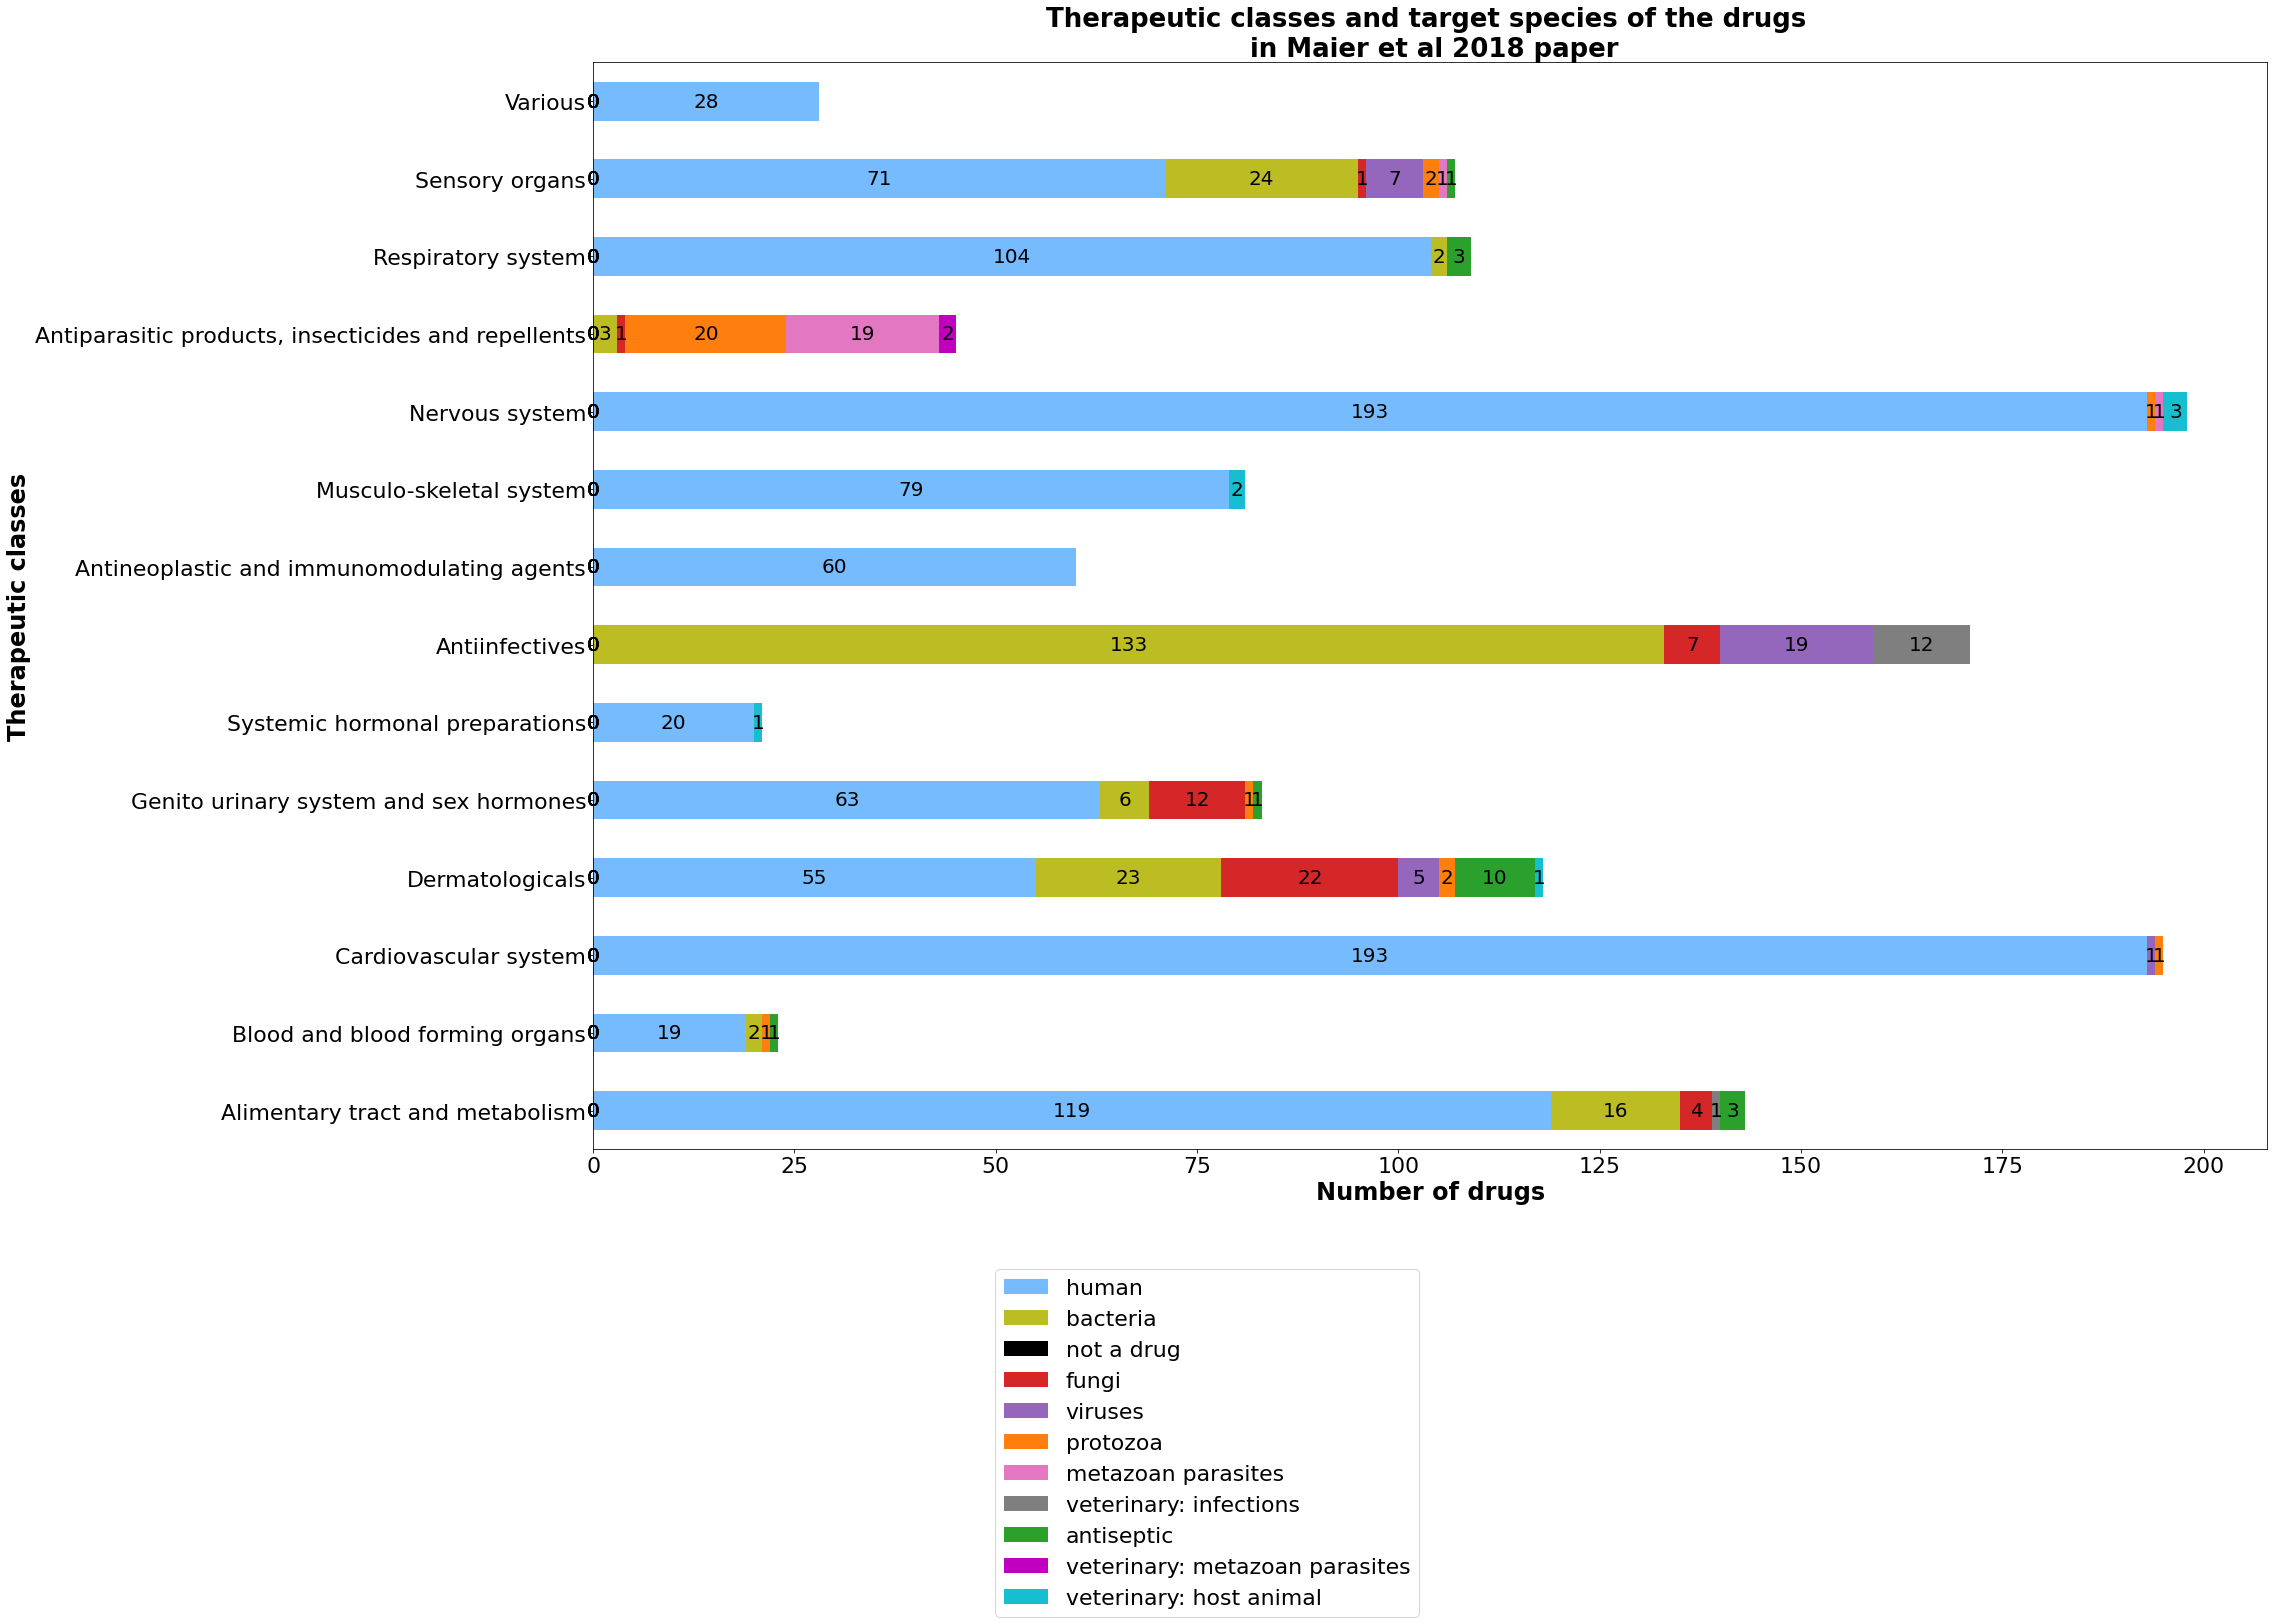

In [76]:
colNo=len(finaldf.columns)
colors = ['xkcd:sky blue', 'tab:olive', 'k', 'tab:red', 'tab:purple', 'tab:orange', 'tab:pink', 'tab:gray', 'tab:green', 'm','tab:cyan']
ax = finaldf.iloc[:, 0:colNo-1].plot.barh(align='center', stacked=True, figsize=(30,20), color=colors)

bars1 = list(np.array(finaldf.human))
bars1=list(map(int, bars1))
bars2 = list(np.array(finaldf.bacteria))
bars2=list(map(int, bars2))
bars3 = list(np.array(finaldf['not a drug']))
bars3=list(map(int, bars3))
bars4 = list(np.array(finaldf.fungi))
bars4=list(map(int, bars4))
bars5 = list(np.array(finaldf.viruses))
bars5=list(map(int, bars5))
bars6 = list(np.array(finaldf.protozoa))
bars6=list(map(int, bars6))
bars7 = list(np.array(finaldf['metazoan parasites']))
bars7=list(map(int, bars7))
bars8 = list(np.array(finaldf['veterinary: infections']))
bars8=list(map(int, bars8))
bars9 = list(np.array(finaldf.antiseptic))
bars9=list(map(int, bars9))
bars10 = list(np.array(finaldf['veterinary: metazoan parasites']))
bars10=list(map(int, bars10))
bars11 = list(np.array(finaldf['veterinary: host animal']))
bars11=list(map(int, bars11))

plt.bar_label(ax.containers[0], bars1, label_type='center',fontsize=20)
plt.bar_label(ax.containers[1],bars2,  label_type='center',fontsize=20)
plt.bar_label(ax.containers[2],bars3,  label_type='center',fontsize=20)
plt.bar_label(ax.containers[3],bars4,  label_type='center',fontsize=20)
plt.bar_label(ax.containers[4],bars5,  label_type='center',fontsize=20)
plt.bar_label(ax.containers[5],bars6, label_type='center',fontsize=20)
plt.bar_label(ax.containers[6],bars7,  label_type='center',fontsize=20)
plt.bar_label(ax.containers[7],bars8, label_type='center',fontsize=20)
plt.bar_label(ax.containers[8],bars9, label_type='center',fontsize=20)
plt.bar_label(ax.containers[9],bars10, label_type='center',fontsize=20)
plt.bar_label(ax.containers[10],bars11, label_type='center',fontsize=20)

horiz_offset = 0.5
vert_offset = -0.1
plt.legend(bbox_to_anchor=(horiz_offset, vert_offset),fontsize=22)
plt.title('Therapeutic classes and target species of the drugs \n in Maier et al 2018 paper',fontsize=26, fontweight='bold')
plt.xlabel('Number of drugs',fontsize=24, fontweight='bold')
plt.ylabel('Therapeutic classes',fontsize=24, fontweight='bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(22)
plt.xticks()
plt.yticks()
# plt.savefig('allDrugs_barplot.pdf',format='pdf', bbox_inches="tight")

# neuroactive drugs

In [18]:
targetSpDF=Drugs.copy()
ATCdrugs=Drugs.copy()
ATCdrugs=ATCdrugs[['ATCcodes']]
classList=['N0']
indexList=[]
uniqueSpecies=targetSpDF.targetSpecies.value_counts()
uniqueSpecies=uniqueSpecies.index.tolist()
allClassesDF=[]
for classe in classList:
    classData=[]
    classDrugs=[]
    classIndexes=[]
    classesList=classList.copy()
    classesList.remove(classe)  
    for index, row in ATCdrugs.iterrows():
        rowClasses=[]
        rowDF=ATCdrugs.iloc[[index]]
        rowValues=rowDF.values.tolist()[0]
        rowValues=[item.split() for item in rowValues][0]
        for value in rowValues:
            if (value.startswith(classe) or value.startswith("Q"+classe)):
                classIndexes.append(index)     
    classIndexes=list(set(classIndexes))                
    if classIndexes != []:
        targetSpec=targetSpDF[targetSpDF.index.isin(classIndexes)]
targetSpec  

,prestwickID,DrugName,CID,ATCcodes,targetSpecies
4,Prestw-1001,Alfadolone acetate,CIDs00024733,N01AX,human
5,Prestw-1002,Alfaxalone,CIDs00068930,N01AX05,human
7,Prestw-1004,Meptazinol hydrochloride,CIDs00041049,N02AX05,human
13,Prestw-101,R(-) Apomorphine hydrochloride hemihydrate,CIDs00002215,G04BE07 N04BC07,human
18,Prestw-1014,Sertraline,CIDs00005203,N06AB06,human
...,...,...,...,...,...
1183,Prestw-980,Piribedil hydrochloride,CIDs00004850,N04BC08,human
1188,Prestw-99,Mianserine hydrochloride,CIDs00004184,N06AX03,human
1190,Prestw-992,Pizotifen malate,CIDs00168993,N02CX01,human
1193,Prestw-995,Fluvoxamine maleate,CIDs00003404,N06AB08,human


In [19]:
# targetSpec.to_excel('MaierEtAl2018_neuroactiveDrugs.xlsx')

In [20]:
print('number of neuro drugs', len(list(targetSpec.prestwickID.unique())))

number of neuro drugs 198


# all other drugs

In [12]:
targetSpDF=Drugs.copy()
ATCdrugs=Drugs.copy()
ATCdrugs=ATCdrugs[['ATCcodes']]
classList=['N0']
indexList=[]
uniqueSpecies=targetSpDF.targetSpecies.value_counts()
uniqueSpecies=uniqueSpecies.index.tolist()
allClassesDF=[]
for classe in classList:
    classData=[]
    classDrugs=[]
    classIndexes=[]
    classesList=classList.copy()
    classesList.remove(classe)  
    for index, row in ATCdrugs.iterrows():
        rowClasses=[]
        rowDF=ATCdrugs.iloc[[index]]
        rowValues=rowDF.values.tolist()[0]
        rowValues=[item.split() for item in rowValues][0]
        for value in rowValues:
            if (value.startswith(classe) or value.startswith("Q"+classe)):
                classIndexes.append(index)     
    classIndexes=list(set(classIndexes))                
    if classIndexes != []:
        targetSpec=targetSpDF[~targetSpDF.index.isin(classIndexes)]
targetSpec  

,prestwickID,DrugName,CID,ATCcodes,targetSpecies
0,Prestw-1,Azaguanine-8,CIDs00008646,L01BB,human
1,Prestw-10,Sulfaguanidine,CIDs00005324,A07AB03,bacteria
2,Prestw-100,Nocodazole,CIDs00004122,L01XX,human
3,Prestw-1000,Lymecycline,CIDs54687131,J01AA04,bacteria
6,Prestw-1003,Azapropazone,CIDs00026098,M01AX04,human
...,...,...,...,...,...
1189,Prestw-991,Gliquidone,CIDs00091610,A10BB08,human
1191,Prestw-993,Ribavirin,CIDs00005064,J05AB04,viruses
1192,Prestw-994,Cyclopenthiazide,CIDs00002904,C03AA07,human
1194,Prestw-997,Fluticasone propionate,CIDs00003399,D07AC17,human


In [13]:
# targetSpec.to_excel('MaierEtAl2018_AllOtherDrugs.xlsx')

In [15]:
print('number of drugs except neuro', len(list(targetSpec.prestwickID.unique())))

number of drugs except neuro 999


## barplot with target species of all drugs except neuro

In [20]:
speciesss=targetSpec.copy()
species=speciesss.targetSpecies.value_counts()
speciesDF=species.to_frame()
speciesCounts=speciesDF.targetSpecies.tolist()
speciesNames=speciesDF.index.tolist()
speciesDF=speciesDF.reset_index()
speciesDF.rename(columns = {'index':'targetSpecies', 'targetSpecies':'allOtherDrugs'}, inplace = True)
# PspeciesDF=speciesDF.copy()
# PspeciesDF.iloc[:, 1:] = (100. * PspeciesDF.iloc[:, 1:] / PspeciesDF.iloc[:, 1:].sum()).round(1)
# print(speciesDF)
# PspeciesDF
speciesDF=speciesDF.set_index(['targetSpecies'])
speciesDF.loc['Total',:]= speciesDF.sum(axis=0)
speciesDF=speciesDF.T
speciesDF

targetSpecies,human,bacteria,not a drug,fungi,viruses,protozoa,metazoan parasites,veterinary: infections,antiseptic,veterinary: metazoan parasites,veterinary: host animal,Total
allOtherDrugs,642.0,144.0,88.0,27.0,22.0,19.0,18.0,12.0,12.0,11.0,4.0,999.0


(array([0]), [Text(0, 0, 'allOtherDrugs')])

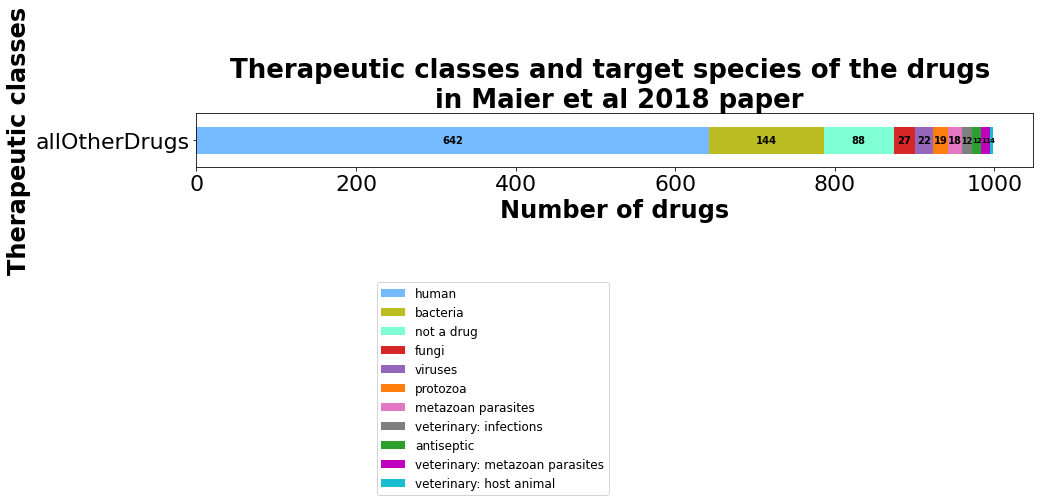

In [67]:
colNo=len(speciesDF.columns)
colors = ['xkcd:sky blue', 'tab:olive', 'aquamarine', 'tab:red', 'tab:purple', 'tab:orange', 'tab:pink', 'tab:gray', 'tab:green', 'm','tab:cyan']
# ax = finaldf.iloc[:, 0:colNo-1].plot.barh(align='center', stacked=True, figsize=(30,20), color=colors)
ax = speciesDF.iloc[:, 0:colNo-1].plot.barh(align='center', stacked=True,figsize=(15,1), color=colors)

bars1 = list(np.array(speciesDF.human))
bars1=list(map(int, bars1))
bars2 = list(np.array(speciesDF.bacteria))
bars2=list(map(int, bars2))
bars3 = list(np.array(speciesDF['not a drug']))
bars3=list(map(int, bars3))
bars4 = list(np.array(speciesDF.fungi))
bars4=list(map(int, bars4))
bars5 = list(np.array(speciesDF.viruses))
bars5=list(map(int, bars5))
bars6 = list(np.array(speciesDF.protozoa))
bars6=list(map(int, bars6))
bars7 = list(np.array(speciesDF['metazoan parasites']))
bars7=list(map(int, bars7))
bars8 = list(np.array(speciesDF['veterinary: infections']))
bars8=list(map(int, bars8))
bars9 = list(np.array(speciesDF.antiseptic))
bars9=list(map(int, bars9))
bars10 = list(np.array(speciesDF['veterinary: metazoan parasites']))
bars10=list(map(int, bars10))
bars11 = list(np.array(speciesDF['veterinary: host animal']))
bars11=list(map(int, bars11))

plt.bar_label(ax.containers[0], bars1, label_type='center',fontsize=10,fontweight='bold')
plt.bar_label(ax.containers[1],bars2,  label_type='center',fontsize=10,fontweight='bold')
plt.bar_label(ax.containers[2],bars3,  label_type='center',fontsize=10,fontweight='bold')
plt.bar_label(ax.containers[3],bars4,  label_type='center',fontsize=10,fontweight='bold')
plt.bar_label(ax.containers[4],bars5,  label_type='center',fontsize=10,fontweight='bold')
plt.bar_label(ax.containers[5],bars6, label_type='center',fontsize=10,fontweight='bold')
plt.bar_label(ax.containers[6],bars7,  label_type='center',fontsize=10,fontweight='bold')
plt.bar_label(ax.containers[7],bars8, label_type='center',fontsize=8,fontweight='bold')
plt.bar_label(ax.containers[8],bars9, label_type='center',fontsize=7,fontweight='bold')
plt.bar_label(ax.containers[9],bars10, label_type='center',fontsize=7,fontweight='bold')
plt.bar_label(ax.containers[10],bars11, label_type='center',fontsize=7,fontweight='bold')

horiz_offset = 0.5
vert_offset = -2
plt.legend(bbox_to_anchor=(horiz_offset, vert_offset),fontsize=12)
plt.title('Therapeutic classes and target species of the drugs \n in Maier et al 2018 paper',fontsize=26, fontweight='bold')
plt.xlabel('Number of drugs',fontsize=24, fontweight='bold')
plt.ylabel('Therapeutic classes',fontsize=24, fontweight='bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(22)
plt.xticks()
plt.yticks()
# plt.savefig('allOtherDrugs_barplot.png', bbox_inches="tight")